In [307]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 860, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 860 (delta 122), reused 255 (delta 116), pack-reused 598
Receiving objects: 100% (860/860), 159.30 MiB | 22.17 MiB/s, done.
Resolving deltas: 100% (385/385), done.
Updating files: 100% (146/146), done.
/content/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks/DS4B_Sp24/Homeworks


## # IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO YOUR GOOGLE DRIVE!

# HW2: Predicting Patient Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. These are the skills you will need to have for your term project.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv"

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and columns, and show the first few rows in the dataset.**

In [309]:
df = pd.read_csv(data_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighborhood    110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

**2. Check out if there are any Na or NaN values. If there are any, drop all the observations that include such values in any of the columns.** (This is not necessarily what you should do in your projects)

In [310]:
NaN = df.isna()
df = df.dropna()
print(df)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841190e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572130e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596270e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557660e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213490e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775120e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age       Neighborhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

### Dealing with dates

**3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this).**

In [311]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

print("The schedule days are:")
print(df['ScheduledDay'])

print("\nThe appointment days are:")
print(df['AppointmentDay'])


The schedule days are:
0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

The appointment days are:
0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]


**4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [312]:
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()
df['ScheduledDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-05-03 00:00:00+00:00
110523   2016-05-03 00:00:00+00:00
110524   2016-04-27 00:00:00+00:00
110525   2016-04-27 00:00:00+00:00
110526   2016-04-27 00:00:00+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

**5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field is numeric - and not of form "TimeDelta", which is the difference between two datetimes. (you can apply `dt.days`  to a datetime object to accomplish this).**

In [313]:
df['TimeInAdvance'] = abs(df['ScheduledDay'] - df['AppointmentDay']).dt.days
df['TimeInAdvance']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: TimeInAdvance, Length: 110527, dtype: int64

There are many other features you may want to extract from date variables, such as the time at which the appointment was scheduled, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data. Comment on any weird values you see in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed.**

In [314]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183883
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254875
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


**Weird value observations**</br>
1. The min of `Age` is -1, the max is 115.
2. `Handicap` should be 0 or 1 value, while the max is 4.
3. `TimeInAdvance` has the max value 179, which looks like an outlier.

</br>**Why remove the values**
1. Remove age smaller than 0 because it is invalid
2. Remove handicap 4 because it is invalid
3. Remove `TimeInAdvance` is greater than 100, because they can be considered as outliers.

In [315]:
original_count = df.shape[0]
df_filtered = df[(df['Age'] >= 0) & (df['Handicap'] <= 1) & (df['TimeInAdvance'] <= 100)]
after_count = df_filtered.shape[0]

print("Deleted entry number is:")
print(original_count - after_count)

Deleted entry number is:
338


### Dealing with binary variables

**7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.**

In [316]:
df = df_filtered
df['IsFemale'] = np.where(df['Gender'] == 'F', 1, 0)
print(df['IsFemale'])

0         1
1         0
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: IsFemale, Length: 110189, dtype: int64


<ipython-input-316-4e1ca36224ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsFemale'] = np.where(df['Gender'] == 'F', 1, 0)


**8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [317]:
df['No-show'] = np.where(df['No-show'] == 'Yes', 1, 0)
print(df['No-show'])

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110189, dtype: int64


<ipython-input-317-456555c6ed76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No-show'] = np.where(df['No-show'] == 'Yes', 1, 0)


### Dealing with categorical variables

**9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?**

In [318]:
unique_neighborhoods = df['Neighborhood'].nunique()
print(f"There are {unique_neighborhoods} unique neighborhoods.")

print("\nThe 5 most common ones are:")
most_df = df['Neighborhood'].value_counts().head(5)
print(most_df)

print("\nThe 5 lease common ones are:")
least_df = df['Neighborhood'].value_counts().tail(5)
print(least_df)

There are 81 unique neighborhoods.

The 5 most common ones are:
JARDIM CAMBURI     7713
MARIA ORTIZ        5804
RESISTÊNCIA        4411
JARDIM DA PENHA    3870
ITARARÉ            3507
Name: Neighborhood, dtype: int64

The 5 lease common ones are:
ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
Name: Neighborhood, dtype: int64


**10. We often group together categories that are very rare because it's hard to generalize from them. Use .value_counts to find the total in each neighborhood.  Then, for the neighborhoods that appear less than 2000 times in the dataset replace their name with "OTHER". (Code provided below:)**

In [319]:
## sample code - make sure to replace "df" with your data frame name if needed
counts = df['Neighborhood'].value_counts()
minor = counts[counts < 2000].index.tolist()
df.loc[df['Neighborhood'].isin(minor), 'Neighborhood'] = 'OTHER'
df['Neighborhood'].value_counts()

OTHER                43691
JARDIM CAMBURI        7713
MARIA ORTIZ           5804
RESISTÊNCIA           4411
JARDIM DA PENHA       3870
ITARARÉ               3507
CENTRO                3327
TABUAZEIRO            3123
SANTA MARTHA          3113
JESUS DE NAZARETH     2851
BONFIM                2769
SANTO ANTÔNIO         2744
CARATOÍRA             2561
SANTO ANDRÉ           2560
JABOUR                2508
SÃO PEDRO             2433
NOVA PALESTINA        2261
ILHA DO PRÍNCIPE      2258
ANDORINHAS            2255
DA PENHA              2209
ROMÃO                 2204
GURIGICA              2017
Name: Neighborhood, dtype: int64

**11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method (note - in class we discussed the need to create k-1 dummies if there are k categories when doing regression.  We do NOT have to do this with trees.  Tree models do not require creation of a baseline dummy variable - so you can use drop_first=False with `get_dummies`, which is the default.). Make sure to add the dummies to your data frame, and also drop the Neighborhood column once the dummies are created.**

In [320]:
dummies = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')
df_with_dummies = pd.concat([df, dummies], axis = 1)
df_with_dummies.drop('Neighborhood', axis=1, inplace=True)
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110189 entries, 0 to 110526
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   PatientId                       110189 non-null  float64            
 1   AppointmentID                   110189 non-null  int64              
 2   Gender                          110189 non-null  object             
 3   ScheduledDay                    110189 non-null  datetime64[ns, UTC]
 4   AppointmentDay                  110189 non-null  datetime64[ns, UTC]
 5   Age                             110189 non-null  int64              
 6   Scholarship                     110189 non-null  int64              
 7   Hypertension                    110189 non-null  int64              
 8   Diabetes                        110189 non-null  int64              
 9   Alcoholism                      110189 non-null  int64              
 

### Dealing with panel data


There are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions.

For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment..this is advanced so we give you the code to create this attribute.

**12. Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (Code provided: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable)**

In [321]:
df = df_with_dummies
df = df.sort_values(['PatientId', 'ScheduledDay'])
df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()
print(df['PreviousNoShows'].describe())

count    110189.000000
mean          0.435869
std           0.820452
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          18.000000
Name: PreviousNoShows, dtype: float64


There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**13. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**

In [322]:
df_drop = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110189 entries, 100517 to 76224
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          110189 non-null  object
 1   Age                             110189 non-null  int64 
 2   Scholarship                     110189 non-null  int64 
 3   Hypertension                    110189 non-null  int64 
 4   Diabetes                        110189 non-null  int64 
 5   Alcoholism                      110189 non-null  int64 
 6   Handicap                        110189 non-null  int64 
 7   SMS_received                    110189 non-null  int64 
 8   No-show                         110189 non-null  int64 
 9   TimeInAdvance                   110189 non-null  int64 
 10  IsFemale                        110189 non-null  int64 
 11  Neighborhood_ANDORINHAS         110189 non-null  uint8 
 12  Neighborhood_BONFIM       

### Predictive modeling

**14. Let's build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=123`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set, and report the accuracy on the training set and the test set.**


In [323]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [333]:
df = df_drop
df = df.drop(columns=['Gender'])
X = df.drop('No-show', axis=1)
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

decisionTree = DecisionTreeClassifier(max_depth=3)
pred = decisionTree.fit(X_train, y_train)
predictions = pred.predict(X_test)
accuracy = accuracy_score(y_test, predictions).round(3)
print(f"Accuracy: {accuracy}")

Accuracy: 0.924


**15. Now lets do 5-fold cross validation by calling cross_val_score with the FULL X and y data (the function does the splitting and fitting for us). Use the option `scoring="accuracy"`.  Find the mean accuracy of the 5 numbers returned.**

In [334]:
cv_score = cross_val_score(decisionTree, X, y, scoring="accuracy", cv=5)
cv_score.mean().round(3)

0.923

**16. Lets see what is the optimal depth for this tree. Create a for-loop that cycles over all max_depth values between 2 and 15 and prints out the mean cross-validated test accuracy for each value of max_depth.  Which value of max_depth has the highest cross-validated accuracy?**

In [326]:
max_depth = 2
max_acc = 0

for depth in range(2,16):
  decisionTree = DecisionTreeClassifier(max_depth=depth)
  cv_score = cross_val_score(decisionTree, X, y, scoring="accuracy", cv=5).mean().round(3)
  if cv_score > max_acc:
    max_acc = cv_score
    max_depth = depth
  print(f"Depth: {depth}, mean accuracy: {cv_score.mean()}")

Depth: 2, mean accuracy: 0.922
Depth: 3, mean accuracy: 0.923
Depth: 4, mean accuracy: 0.923
Depth: 5, mean accuracy: 0.923
Depth: 6, mean accuracy: 0.923
Depth: 7, mean accuracy: 0.923
Depth: 8, mean accuracy: 0.922
Depth: 9, mean accuracy: 0.921
Depth: 10, mean accuracy: 0.92
Depth: 11, mean accuracy: 0.918
Depth: 12, mean accuracy: 0.917
Depth: 13, mean accuracy: 0.917
Depth: 14, mean accuracy: 0.915
Depth: 15, mean accuracy: 0.914


In [327]:
print(f"Depth of {max_depth} has the higest mean accuracy of {max_acc}.")

Depth of 3 has the higest mean accuracy of 0.923.


**16b (Extra Credit) : Using the same for-loop, output for each level of max_depth the trainging accuracy, test accuracy, and cross_val accuracy.  Make a plot of depth(X-axis) vs accuracy(Y-axis) with three lines for (train, test, and cv) accuracy.   Interpret what you see.**


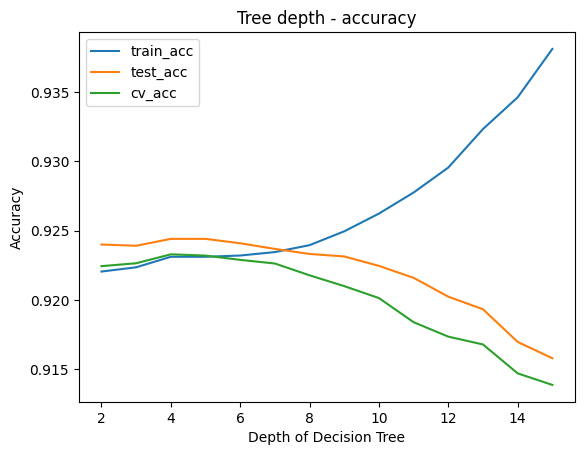

In [328]:
max_depth = 2
max_acc = 0

depths = []
train = []
test = []
cv = []

for depth in range(2,16):
  decisionTree = DecisionTreeClassifier(max_depth=depth)
  depths.append(depth)

  # train test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
  model = decisionTree.fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_test = model.predict(X_test)

  train_acc = accuracy_score(y_train, predictions_train)
  test_acc = accuracy_score(y_test, predictions_test)

  train.append(train_acc)
  test.append(test_acc)

  # Cross-val
  cv_score = cross_val_score(decisionTree, X, y, scoring="accuracy", cv=5).mean()
  cv.append(cv_score)
  if cv_score > max_acc:
    max_acc = cv_score
    max_depth = depth

plt.plot(depths, train, label='train_acc')
plt.plot(depths, test, label='test_acc')
plt.plot(depths, cv, label='cv_acc')

plt.title("Tree depth - accuracy")
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**17.  Fit the tree model (again) using the optimal depth.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (Y_test).**

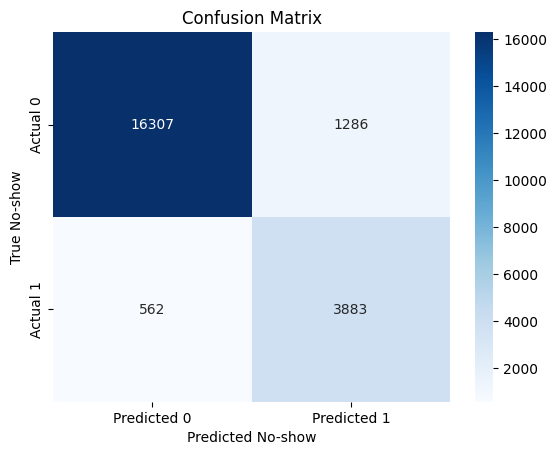

In [329]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Highest accuracy depth 4 is shown in [262]
decisionTree = DecisionTreeClassifier(max_depth=depth)
model = decisionTree.fit(X_train, y_train)
predictions = model.predict(X_test)

# Create a confusion matrix
# 1 means patient didn't show up while 0 means they showed up
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('True No-show')
plt.xlabel('Predicted No-show')
plt.title('Confusion Matrix')
plt.show()

- Quarter 1: Actual 0, predicted 1: 1283 | False Positive
- Quarter 2: Actual 0, predicted 0: 16310 | True Negative
- Quarter 3: Actual 1, predicted 0: 563 | False Negative
- Quarter 4: Actual 1, predicted 1: 3880 | True Postive

**18. Use the functions `precision_score` and `recall_score` to calculate precision and recall - these numbers should correspond to the appropriate calculations from the 2x2 table.**

In [330]:
precision = precision_score(y_test, predictions).round(3)
precision_calculated = 3880 / (3880+1283)
precision_calculated = round(precision_calculated, 3)
print(f"Precision: {precision}, calculated precision: {precision_calculated}")

recall =recall_score(y_test, predictions).round(3)
recall_calculated = 3880 / (3880 + 563)
recall_calculated = round(recall_calculated, 3)
print(f"Recall: {recall}, calculated recall: {recall_calculated}")

Precision: 0.751, calculated precision: 0.752
Recall: 0.874, calculated recall: 0.873


**18b.(Extra Credit - 2 points) The precision and recall above were calculated using a threshold of 0.5 (that is, any case with a probability over 0.5 is predicted as No-show).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Change the threshold of labelling a No-show to 0.9 and re-calcuate precision and recall.  (you will need to generate a new 2x2 table and calculate P&R from the values in the table). Interpret the change in P&R between the two thresholds.**

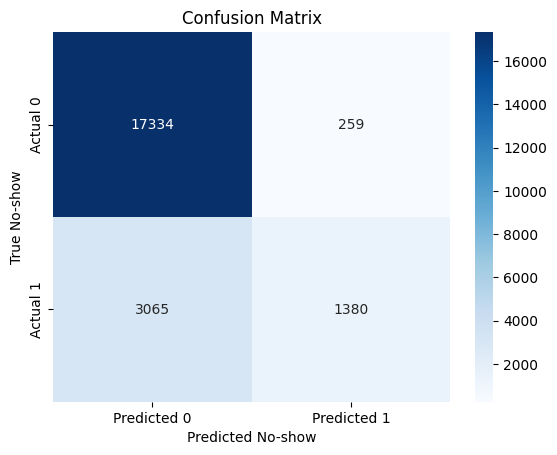

In [331]:
# If >= 0.9, predict as 1, means no showing up
probabilities = model.predict_proba(X_test)
threshold = 0.9
predictions_custom_threshold = np.where(probabilities[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, predictions_custom_threshold)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.ylabel('True No-show')
plt.xlabel('Predicted No-show')
plt.title('Confusion Matrix')
plt.show()

In [332]:
precision = precision_score(y_test, predictions_custom_threshold).round(3)
recall =recall_score(y_test, predictions_custom_threshold).round(3)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.842
Recall: 0.31


**Change**
- Threshold: 0.5 -> 0.9
- Precision: 0.752 -> 0.842
- Recall: 0.873 -> 0.309

According to the data, we can conclude that after we change the threshold to 0.9, the precision improves, means that true positive takes bigger proportion in all predicted positives; On the other hand, however, the recall drastically drop down to 0.309, which means the true positive takes smaller proportion in the real positives. </br>

So, the drop in recall means that the model is now correctly identifying a smaller percentage of the actual positive instances, which is not what we want.
